In [1]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from  matplotlib import pyplot as plt


/tmp/ipykernel_5194/350607424.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
data_path = "https://www.statlearning.com/s/Advertising.csv"
df=pd.read_csv(data_path,index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Text(0, 0.5, 'sales')

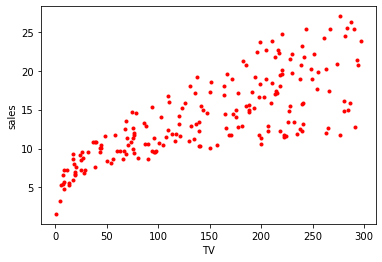

In [4]:
plt.scatter(df['TV'],df['sales'],color='red', marker=".")
plt.xlabel('TV')
plt.ylabel('sales')

In [5]:
X=df[['TV']].values
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [6]:
Y=df[['sales']].values
Y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [7]:
n=len(Y)
n

200

In [8]:
x_mean = np.mean(X)
x_mean

147.0425

In [9]:
y_mean = np.mean(Y)
y_mean

14.0225

In [10]:
Nr=0
Dr=0
for i in range(n):
    Nr+=(X[i]-x_mean)*(Y[i]-y_mean)
    Dr+=(X[i]-x_mean)**2
b1=Nr/Dr
b0=y_mean-b1*x_mean
y = b0+np.dot(X,b1)

    
    

/tmp/ipykernel_5194/3915262651.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("y=%3f + x%3f "%(b0 , b1))


Text(0.5, 1.0, 'y=7.032594 + x0.047537 ')

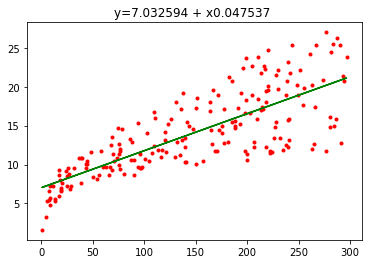

In [11]:
plt.scatter(df['TV'],df['sales'],color='red', marker=".")
plt.plot(X,y,color="green")
plt.title("y=%3f + x%3f "%(b0 , b1))

Now we will elobrate this concept to find value of b0 and b1 for all cases by defining function

In [12]:
fig = plt.figure(figsize=(15,4))
fig

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

In [33]:
def find_value(df,feature,color):
    
    x=df[[feature]].values
    y=df[["sales"]].values
    
    n=len(y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    numerator =0
    denomerator =0
    
    for i in range(n):
        
        numerator += (x[i]-x_mean)*(y[i]-y_mean)
        denomerator += (x[i]-x_mean)**2
        
    b1 = numerator/denomerator
    b0 = y_mean - (b1*x_mean)
    y_eq = b0 + np.dot(x,b1)
    print(b0,b1)
    print(("y = %3f + %3fx"%(b0,b1)))
    
    #for plotting graph of individuals
    plt.scatter(df[feature],df['sales'],color=color,marker= ".")
    plt.plot(x,y_eq,color="black")
    plt.xlabel(feature)
    plt.ylabel("sales")

[7.03259355] [0.04753664]
y = 7.032594 + 0.047537x


/tmp/ipykernel_5194/2033056149.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(("y = %3f + %3fx"%(b0,b1)))


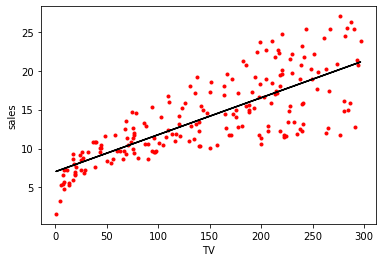

In [34]:
find_value(df,"TV","red")

[9.3116381] [0.20249578]
y = 9.311638 + 0.202496x


/tmp/ipykernel_5194/2033056149.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(("y = %3f + %3fx"%(b0,b1)))


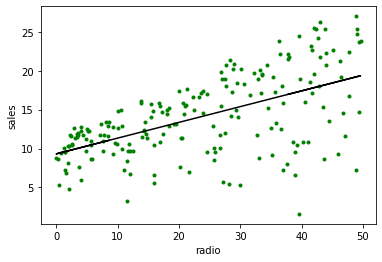

In [35]:
find_value(df,"radio","green")

[12.35140707] [0.0546931]
y = 12.351407 + 0.054693x


/tmp/ipykernel_5194/2033056149.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(("y = %3f + %3fx"%(b0,b1)))


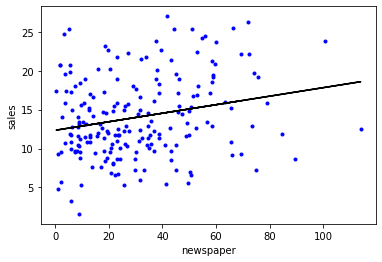

In [36]:
find_value(df,"newspaper","blue")